#  REGRESSION LOGISTIQUE

## introduction

Dans cet exercice guid√© nous allons pratiquer la r√©gression logistique sous Python via les packages ¬´ statsmodels ¬ª et ¬´ scikit-learn ¬ª.
  nous t√¢cherons de d√©crire les diff√©rentes √©tapes de la construction du mod√®le √† son √©valuation et la mesure de ses performances pr√©dictives.

## Utilisation du package scikit-learn

## Import des librairies

Pour commencer nous allons utiliser uniquement le packages scikit-learn
hormis les librairies classiques importez celle utilis√©e pour la regression logistique et celles pour les m√©triques necessaires (matrice de confusion, rapport des m√©triques)



In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scikitplot as skplt
from sklearn import metrics
import seaborn as sns

## Import du dataset

Nous analysons dans cet exercice les facteurs de risque d'infid√©lit√© dans les m√©nages. NOus verrons que le facteur temps est bien √©videmment un param√®tre qui joue en faveur de l'infid√©lit√©. Mais pas seulement, d'autres variables √©galement.

In [2]:
#importez votre dataset
df_infid = pd.read_excel('dataset_infidelites.xlsx')

## descrivez et visualisez votre dataset

In [3]:
#d√©crivez rapidement votre jeu de donn√©es
print(df_infid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             601 non-null    int64  
 1   Age             601 non-null    float64
 2   YearsMarried    601 non-null    float64
 3   Children        601 non-null    int64  
 4   Religious       601 non-null    int64  
 5   Education       601 non-null    int64  
 6   Occupation      601 non-null    int64  
 7   RatingMarriage  601 non-null    int64  
 8   Infidelite      601 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.4 KB
None


In [4]:
df_infid.describe()

Sex         Age  YearsMarried    Children   Religious  \
count  601.000000  601.000000    601.000000  601.000000  601.000000   
mean     0.475874   32.487521      8.177696    0.715474    3.116473   
std      0.499834    9.288762      5.571303    0.451564    1.167509   
min      0.000000   17.500000      0.125000    0.000000    1.000000   
25%      0.000000   27.000000      4.000000    0.000000    2.000000   
50%      0.000000   32.000000      7.000000    1.000000    3.000000   
75%      1.000000   37.000000     15.000000    1.000000    4.000000   
max      1.000000   57.000000     15.000000    1.000000    5.000000   

        Education  Occupation  RatingMarriage  Infidelite  
count  601.000000  601.000000      601.000000  601.000000  
mean    16.166389    4.194676        3.931780    0.249584  
std      2.402555    1.819443        1.103179    0.433133  
min      9.000000    1.000000        1.000000    0.000000  
25%     14.000000    3.000000        3.000000    0.000000  
50%     16.000000    5.000000        4.000000    0.000000  
75%     18.000000    6.000000        5.000000    0.000000  
max     20.000000    7.000000        5.000000    1.000000

In [5]:
#R√©alisez une br√®ve analyse exploratoire
# en affichant la matrice de correlation
df_corr = df_infid.corr(method='pearson')
df_corr.head(10)

Sex       Age  YearsMarried  Children  Religious  \
Sex             1.000000  0.190641      0.030283  0.069222   0.007679   
Age             0.190641  1.000000      0.777546  0.421931   0.193777   
YearsMarried    0.030283  0.777546      1.000000  0.572857   0.218261   
Children        0.069222  0.421931      0.572857  1.000000   0.129351   
Religious       0.007679  0.193777      0.218261  0.129351   1.000000   
Education       0.397505  0.134596      0.040003 -0.006986  -0.042571   
Occupation      0.467923  0.166413      0.044592 -0.092727  -0.039722   
RatingMarriage -0.007524 -0.199000     -0.243119 -0.196276   0.024296   
Infidelite      0.050956  0.057322      0.140301  0.133605  -0.130090   

                Education  Occupation  RatingMarriage  Infidelite  
Sex              0.397505    0.467923       -0.007524    0.050956  
Age              0.134596    0.166413       -0.199000    0.057322  
YearsMarried     0.040003    0.044592       -0.243119    0.140301  
Children        -0.006986   -0.092727       -0.196276    0.133605  
Religious       -0.042571   -0.039722        0.024296   -0.130090  
Education        1.000000    0.533605        0.109303    0.019286  
Occupation       0.533605    1.000000        0.017422    0.037642  
RatingMarriage   0.109303    0.017422        1.000000   -0.253814  
Infidelite       0.019286    0.037642       -0.253814    1.000000

In [6]:
# en visualisant les variables les plus pertinentes
plt.matshow(df_corr)
# A premi√®res vues , qu'en d√©duisez vous ? 

In [7]:
plt.figure(figsize=(8, 8),dpi=300)
sns.heatmap(df_corr, annot=True)
plt.show()

On observe des variables qui corr√®lent avec l'infid√©lit√© :
- En positif avec le nombre d'ann√©es de mariage
- En n√©gatif avec le niveau de religion et la qualit√© du marriage

<Figure size 1800x1800 with 0 Axes>

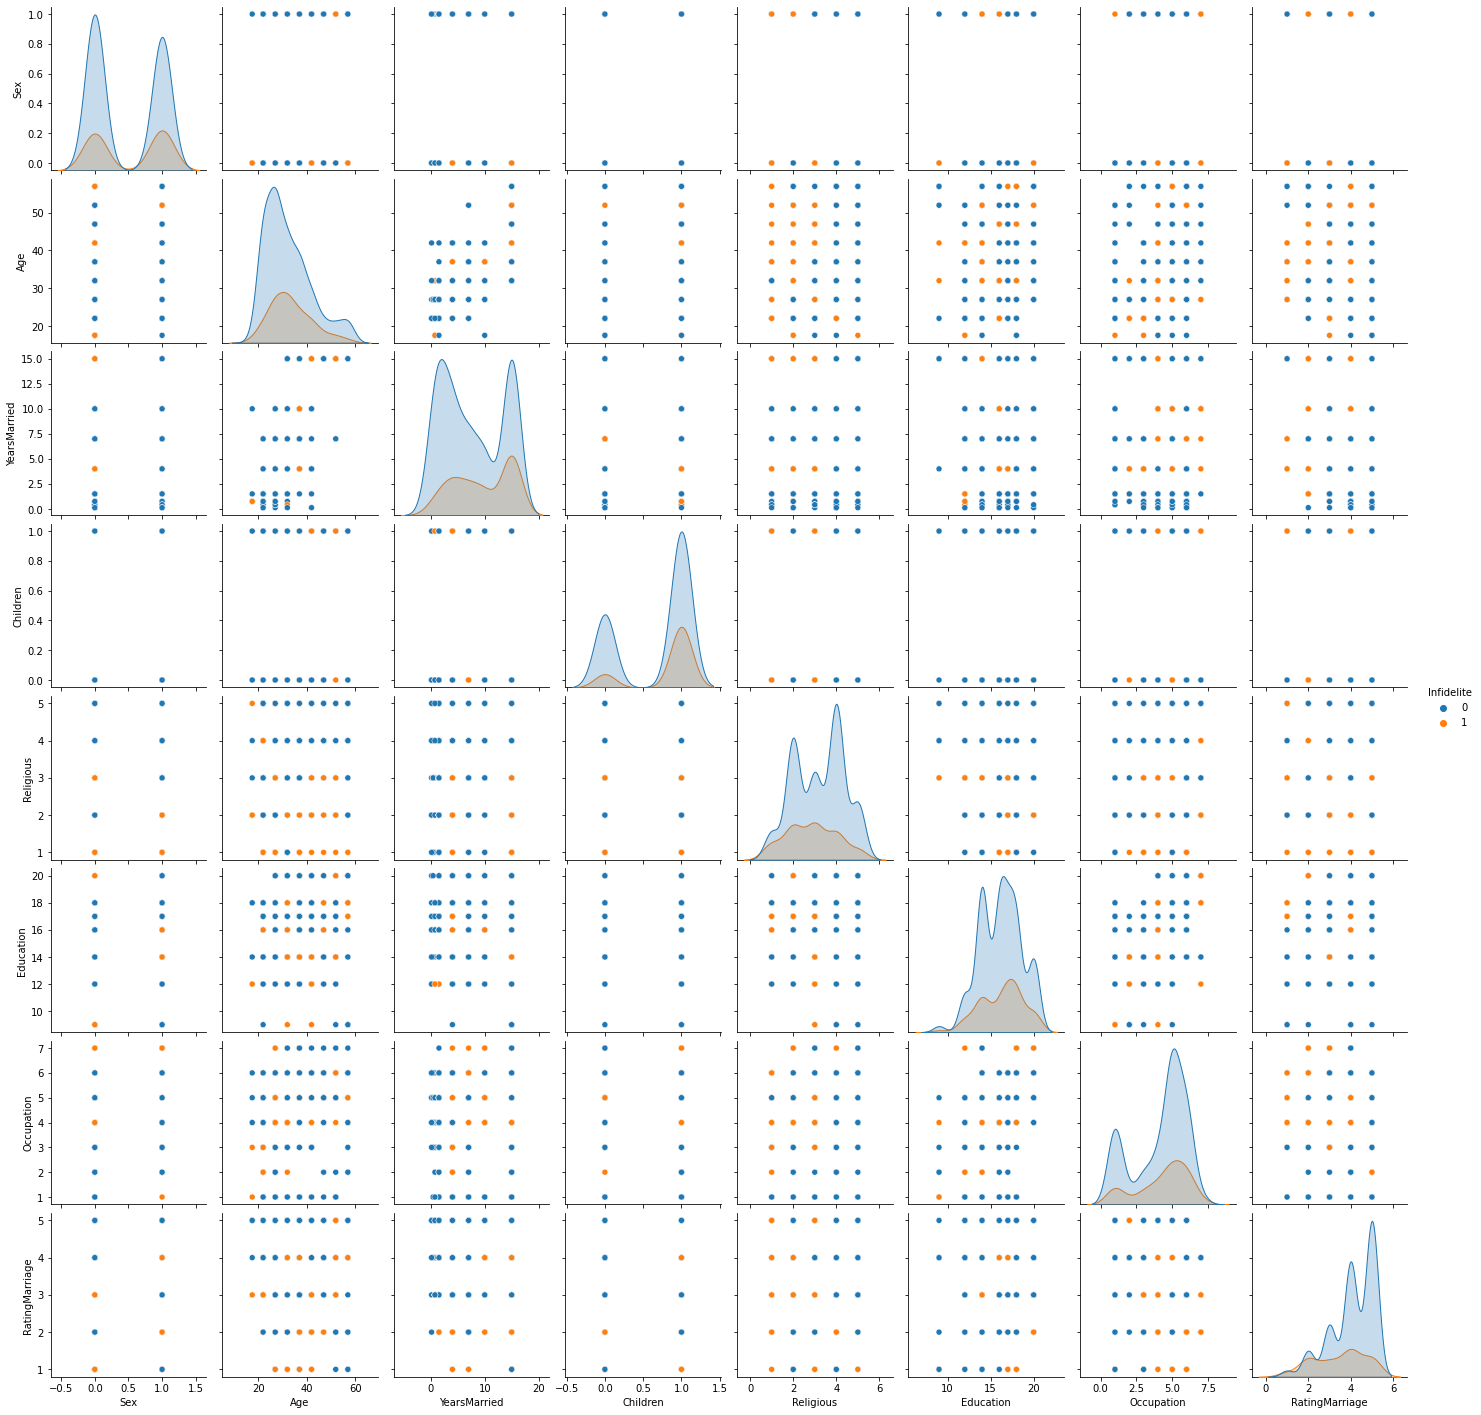

In [8]:
plt.figure(figsize=(6, 6),dpi=300)
sns.pairplot(df_infid, hue='Infidelite')
plt.show()

In [9]:
dfcol = [ "b" if bin else "g" for bin in df_infid['Infidelite'] ]

In [10]:
plt.figure(figsize=(6, 6),dpi=300)
sns.regplot( data = df_infid, x = 'Age', y = 'Religious', x_jitter=4, y_jitter=4, fit_reg = False, scatter_kws={'facecolors' : dfcol})
plt.show()

## S√©parez votre dataset en Train set et Test set

In [11]:
#d√©finissez tout d'abord vos variables : ind√©pendantes/ dependante
X = df_infid.drop(columns=['Infidelite'])
y = df_infid.Infidelite
#splittez votre dataset de sorte √† avoir 1/3 des donn√©es dans le test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33)

In [12]:
# v√©rifiez le nombre de donn√©es y dans chaque jeu (train et test)
print(y_train.shape)
print(y_test.shape)

(402,)
(199,)


## Entrainez la regression logistique sur votre train set

In [13]:
#Nous instancions une r√©gression logistique sans p√©nalit√© c.-√†-d. sans r√©aliser de r√©gularisation pour l'instant
from sklearn.linear_model import LogisticRegression

#lrc = LogisticRegression(solver='liblinear', random_state=0)
lrc = LogisticRegression()
lrc.fit(X_train, y_train)


/home/ericbertrand8686/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
from sklearn.metrics import classification_report
y_pred =lrc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       149
           1       0.50      0.10      0.17        50

    accuracy                           0.75       199
   macro avg       0.63      0.53      0.51       199
weighted avg       0.70      0.75      0.68       199



In [15]:
disp = metrics.plot_confusion_matrix(lrc,X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Confusion matrix:
[[144   5]
 [ 45   5]]


/home/ericbertrand8686/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


In [16]:
print(y_test.values)
print(y_pred)

[0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1
 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 1 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1]


Que se passe t - il ? 
le processus n‚Äôa pas converg√© alors que le nombre maximal d‚Äôit√©ration par d√©faut est (max_iter = 100).(voir doc)

¬´ Scikit-learn ¬ª nous propose alors de : 
- soit augmenter le nombre d‚Äôit√©rations (mais trop de puissance de calcul pour un r√©sultat incertain),
- soit de standardiser les donn√©es avant de lancer l‚Äôalgorithme
La documentation de la r√©gression logistique sous ¬´ scikit-learn ¬ª nous indique les diff√©rents algorithmes d‚Äôoptimisation qu‚Äôil est susceptible d‚Äôutiliser (option ¬´ solver ¬ª)
Ces approches sont sensibles aux diff√©rences d‚Äô√©chelles entre les variables, d‚Äôo√π l‚Äôindication ¬´ scale the data ¬ª dans le
¬´ warning ¬ª envoy√© par la m√©thode fit()

### Standardisation des donn√©es

La doc de la r√©gression logistique sous ¬´ scikit-learn ¬ª nous indique les diff√©rents
algorithmes d‚Äôoptimisation qu‚Äôil est susceptible d‚Äôutiliser (option ¬´ solver ¬ª).
Ces approches sont
sensibles aux diff√©rences d‚Äô√©chelles entre les variables, d‚Äôo√π l‚Äôindication ¬´ scale the data ¬ª dans le
¬´ warning ¬ª envoy√© par la m√©thode fit().

Nous allons donc centrer et r√©duire nos donn√©es avant de relancer le mod√®le

In [17]:
#importation de la biblioth√®que necessaire √† la standardisation
from sklearn import preprocessing
import scipy as sci
#instanciation
scaler = preprocessing.MaxAbsScaler()
#transformation
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)

# imprimer les statistiques de descriptions
scaled_df.describe()
#remarquez que les variables sont bien de moyenne nulle et d‚Äô√©cart-type unitaire.

0           1           2           3           4           5  \
count  601.000000  601.000000  601.000000  601.000000  601.000000  601.000000   
mean     0.475874    0.569957    0.545180    0.715474    0.623295    0.808319   
std      0.499834    0.162961    0.371420    0.451564    0.233502    0.120128   
min      0.000000    0.307018    0.008333    0.000000    0.200000    0.450000   
25%      0.000000    0.473684    0.266667    0.000000    0.400000    0.700000   
50%      0.000000    0.561404    0.466667    1.000000    0.600000    0.800000   
75%      1.000000    0.649123    1.000000    1.000000    0.800000    0.900000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  601.000000  601.000000  
mean     0.599239    0.786356  
std      0.259920    0.220636  
min      0.142857    0.200000  
25%      0.428571    0.600000  
50%      0.714286    0.800000  
75%      0.857143    1.000000  
max      1.000000    1.000000

In [18]:
#quelles sont les valeurs que peuvent prendre y ? essayer avec attribute_classes


### relancez votre mod√®le

In [19]:
# relancez le mod√®le avec les nouvelles valeurs standardis√©es
Xn_train, Xn_test, yn_train, yn_test = train_test_split(scaled_df, y, stratify=y, test_size=0.33)

In [20]:
lrc2 = LogisticRegression(random_state=0)
lrc2.fit(Xn_train, yn_train)

LogisticRegression(random_state=0)

Confusion matrix:
[[143   6]
 [ 46   4]]


/home/ericbertrand8686/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


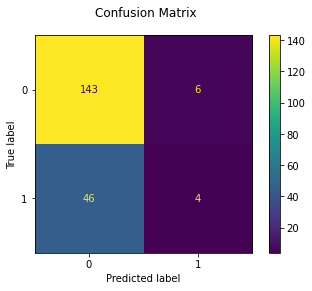

In [21]:
disp = metrics.plot_confusion_matrix(lrc2,Xn_test, yn_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [33]:
#affichez les coefficients
lrc2.coef_


array([[-0.04847553, -0.79329864,  0.76327733,  0.646117  , -1.21689204,
         0.31981867,  0.01007927, -1.9278042 ]])

In [ ]:
lrc2.intercept_

### D√©-standardisation des coefficients

ATTENTION ! nous travaillons sur des donn√©es transform√©es. Nous devons les ¬´ d√©-standardiser ¬ª en les divisant par les √©carts-type des variables.


In [34]:
#correction des coefficients -
#  d√©-standardisationpar les √©carts-type utilis√©s lors de la standardisation des variables
coefUnstd = lrc2.coef_ / lrc2.scale_

#affichage des coefficients corrig√©s


AttributeError: 'LogisticRegression' object has no attribute 'scale_'

In [ ]:
# on fait de m√™me pour la constante (l'ordonn√©e √† l'origine)
interceptUnStd =classifier_std.intercept_ + np.sum(classifier_std.coef_[0]*(-stds.mean_/stds.scale_))
print(interceptUnStd)


[0.81174835]


## Faites des pr√©dictions des r√©sultats du train set

In [ ]:
# calcul des probabilit√©s d'affectation

# on affiche les 5 premi√®res valeurs pr√©dites


array([[0.83464078, 0.16535922],
       [0.85621929, 0.14378071],
       [0.9265064 , 0.0734936 ],
       [0.70229399, 0.29770601],
       [0.48264007, 0.51735993]])

On observe 2 colonnes : la premi√®re correspond au proba d'appartenir √† Y=0 et la seconde √† Y=1

In [ ]:
#et on les compare aux valeurs attendues


          Y=0       Y=1  valeur attendue
569  0.834641  0.165359                0
167  0.856219  0.143781                0
435  0.926506  0.073494                0
413  0.702294  0.297706                0
344  0.482640  0.517360                1
..        ...       ...              ...
335  0.892892  0.107108                0
305  0.733390  0.266610                1
158  0.863535  0.136465                0
401  0.923431  0.076569                0
583  0.869559  0.130441                1

[401 rows x 3 columns]


## Faites des pr√©dictions des r√©sultats du test set

In [ ]:
# nous devons appliquer la m√™me standardisation sur les valeurs du test set ! 

#transformation de l'√©chantillon test


#stat. descriptives
#print(sci.stats.describe(X1_test,axis=0,ddof=0))

# on applique le mod√®le √† l'√©chantillon




## Evaluez les performances du mod√®le √† l'aide de la matrice de confusion 

In [ ]:
# affichez la matrice de confusion

print(cm)

[[144   6]
 [ 41   9]]


- Combien y a t-il de faux positifs ? combien de faux n√©gatifs ?
- Combien d'√©l√©ments sont bien class√©s? 
- repr√©sentez la matrice de confusion sous la forme d'une heatmap

In [ ]:
#affichez le taux d'erreur


0.765


In [ ]:
#affichez le rapport de classification



              precision    recall  f1-score   support

           0       0.78      0.96      0.86       150
           1       0.60      0.18      0.28        50

    accuracy                           0.77       200
   macro avg       0.69      0.57      0.57       200
weighted avg       0.73      0.77      0.71       200



# Utilisons Maintenant Stats.models

## import des librairies

In [ ]:
#importez la librairie ad√©quate
import numpy as np
import statsmodels.api as sm
from statsmodels.api import Logit

## Preparez votre dataset

In [ ]:
#attention StatsModels ne prend pas en compte l'ordonn√©e √†l'origine ùëè‚ÇÄ! 
# vous devez inclure la colonne suppl√©mentaire de "1" dans x. 
#faites cela avec add_constant ():

from statsmodels.tools import add_constant
#donn√©es X avec la constante

#v√©rifier la structure, vous devez bien avoir une colonne en plus



<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 569 to 583
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           401 non-null    float64
 1   Sex             401 non-null    int64  
 2   Age             401 non-null    float64
 3   YearsMarried    401 non-null    float64
 4   Children        401 non-null    int64  
 5   Religious       401 non-null    int64  
 6   Education       401 non-null    int64  
 7   Occupation      401 non-null    int64  
 8   RatingMarriage  401 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 31.3 KB
None


## Entrainez votre mod√®le

In [ ]:
# Cr√©ez votre mod√®le de r√©gression logistique 

#lancez les calculs


Optimization terminated successfully.
         Current function value: 0.511723
         Iterations 6


In [ ]:
#pour acc√©der aux valeurs des coefficients, utilisez .params
#Obtenez vous les m√™me r√©sulats que pr√©cedemment? 


const             0.811794
Sex              -0.040367
Age              -0.016375
YearsMarried      0.061595
Children          0.101120
Religious        -0.307265
Education         0.043020
Occupation        0.044014
RatingMarriage   -0.508548
dtype: float64

In [ ]:
# affichez le rapport des metriques avec stat.model. Il est possible d'utiliser .summary() soit .summary2()
#pour plus d'infos : https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.LogitResults.html

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Infidelite   No. Observations:                  401
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            8
Date:                Wed, 03 Feb 2021   Pseudo R-squ.:                 0.08889
Time:                        21:09:34   Log-Likelihood:                -205.20
converged:                       True   LL-Null:                       -225.22
                                        LLR p-value:                 3.148e-06
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.8118      1.040      0.780      0.435      -1.227       2.851
Sex               -0.0404      0.289     -0.140      0.889      -0.607       0.526
Age               -0.0164      0.021     -0.766      0.444      -0.058       0.026
YearsMarried       0.0616      0.039      1.594      0.111      -0.014       0.137
Children           0.1011      0.343      0.295      0.768      -0.570       0.773
Religious         -0.3073      0.107     -2.867      0.004      -0.517      -0.097
Education          0.0430      0.062      0.693      0.488      -0.079       0.165
Occupation         0.0440      0.088      0.498      0.618      -0.129       0.217
RatingMarriage    -0.5085      0.112     -4.547      0.000      -0.728      -0.289
==================================================================================
"""

## Faites des pr√©dictions des r√©sultats du test set

In [ ]:
#affichez les probabilit√©s de pr√©diction


In [ ]:
#utilisez les pour afficher les valeurs de y en ayant √©tabli un seuil √† 0.5


## Evaluez les performances du mod√®le √† l'aide de la matrice de confusion

In [ ]:
#obtenez la matrice de confusion avec crosstable


col_0         0  1
Infidelite        
0           144  6
1            41  9


In [ ]:
#calculez √©galement le taux de reconnaissance et le taux d'erreur  : (taux d'erreur = 1- taux de reconnaissance)


#taux d'erreur


Taux de reconnaissance : 0.765
Taux d'erreur' :  0.235


Obtenez vous bien les m√™me r√©sultats que pr√©c√©dement ?

## Evaluez les performances du mod√®le √† l'aide du diagramme de fiabilit√©


Le diagramme de fiabilit√© est un outil de diagnostic graphique. Il oppose les proba d'affectation √† la valeur "Y=1" estim√©s par le mod√®le(appel√©s scores)  aux affectations observ√©es. S‚Äôils forment une droite, nous pouvons consid√©rer que la mod√©lisation est
pertinente car le mod√®le arrive √† approcher de mani√®re satisfaisante l‚Äôappartenance aux classes des
individus.

Voici les principales √©tapes de la construction du diagramme de fiabilit√© :
1. Appliquer le classifier sur les donn√©es pour obtenir le score.
2. Trier le fichier selon le score croissant.
3. Sur la base du score, subdiviser les donn√©es en intervalles (ex. 0.0-0.2, 0.2-0.4, etc.).
4. Dans chaque intervalle, calculer la proportion de positifs.
5. Dans le m√™me temps, toujours dans chaque intervalle, calculer la moyenne des scores.
6. Si les chiffres concordent dans chaque intervalle, les scores sont bien calibr√©s, le classifieur est de bonne qualit√©.
7. Nous pouvons r√©sumer l'information dans un graphique nuage de points appel√© diagramme de fiabilit√©, avec en abcisse la moyenne des scores, en ordonn√©e la proportion de "positifs".
8. Si les scores sont bien calibr√©s, les points devraient √™tre align√©s sur une droite, la premi√®re bissectrice.
9. Les points s'√©cartant sensiblement de la premi√®re bissectrice doivent attirer notre attention

In [ ]:
# on cr√© un tableau temporaire avec les valeurs de y observ√©es et les scores


In [ ]:
# on s√©pare les scores en 5 intervalles de largeur √©gales

#et on les int√®gre dans le df



     y     score       intervalle
129  0  0.397588   (0.313, 0.439]
343  0  0.169954  (0.0577, 0.186]
382  0  0.210396   (0.186, 0.313]
514  0  0.223260   (0.186, 0.313]
404  0  0.321415   (0.313, 0.439]
..  ..       ...              ...
358  0  0.076253  (0.0577, 0.186]
235  0  0.255256   (0.186, 0.313]
68   0  0.166297  (0.0577, 0.186]
255  0  0.270479   (0.186, 0.313]
139  0  0.344754   (0.313, 0.439]

[200 rows x 3 columns]


In [ ]:
# on calcule la moyenne des scores dans chaque groupe √† l'aide de pivot_table


                    score
intervalle               
(0.0577, 0.186]  0.129337
(0.186, 0.313]   0.234297
(0.313, 0.439]   0.358634
(0.439, 0.566]   0.509728
(0.566, 0.692]   0.620552


In [ ]:
# puis la moyenne des y observ√©s



                        y
intervalle               
(0.0577, 0.186]  0.178571
(0.186, 0.313]   0.192982
(0.313, 0.439]   0.341463
(0.439, 0.566]   0.400000
(0.566, 0.692]   0.750000


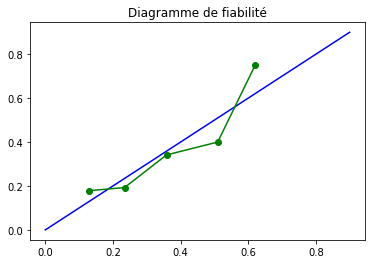

In [ ]:
# on construit le diagramme 
#en faisant apparaitre la diagonale

#et en ajoutant notre diagramme

#titre
plt.title("Diagramme de fiabilit√©")
#trac√©
plt.show()


les points sont tout de m√™me √©loign√©s de la bissectrice, le mod√®le peut √™tre am√©lior√©

## Evaluez les performances du mod√®le √† l'aide de la courbe ROC

Pour √©valuer un mod√®le le taux d‚Äôerreur semble √™tre un indicateur synth√©tique pertinent, il indique (estime) la probabilit√© de mal classer un individu de la population.
Les autres indicateurs sont tr√®s int√©ressants √©galement (sensibilit√©/rappel,pr√©cision/sp√©cificit√©) mais obligent √† surveiller plusieurs valeurs simultan√©ment.

Mais lorsque les classes sont tr√®s d√©s√©quilibr√©es, la matrice de confusion et surtout le
taux d‚Äôerreur donnent souvent une fausse id√©e de la qualit√© de l‚Äôapprentissage. Do√π l'int√©r√™t de la courbe ROC!
les r√©sultats qu'elle fournit sont valables m√™me si l'√©chantillon n'est pas repr√©sentatif

cas du mod√®le qui ne fait pas mieux que l‚Äôaffectation des probabilit√©s
- notre courbe ne doit pas passer en dessous
- plus il s‚Äôen √©carte vers le haut, mieux c‚Äôest

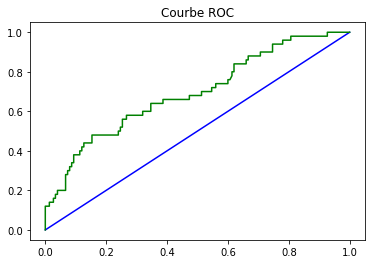

In [ ]:
# on utilise roc_curve (scikit- learn )
# on trace la diagonale de r√©f√©rence
#fpr (false positive rate -- taux de faux positifs) en abscisse
#tpr (true positive rate ‚Äì taux de vrais positifs) en ordonn√©e
#pos_label = 1 pour indiquer la modalit√© cible


In [ ]:
# on calcule l'aire sous la courbe en faisant appel √† la fonction roc_auc_score()


AUC : 0.6934


## Ajustez votre mod√®le

## Selection des variables au regard de leur significativit√© : approche statistique 

### Via le test du rapport de vraisemblance